In [79]:
## importing essential Libraries

import os
import pandas as pd 
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf 
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

## batch specification
batch_size = 50
img_height = 300
img_width = 300


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\valid',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

Found 2168 files belonging to 5 classes.
Using 1735 files for training.
Found 2256 files belonging to 5 classes.
Using 451 files for validation.


In [81]:
class_names

['Bacterial Leaf Blight',
 'Brown Spot',
 'Healthy',
 'Leaf Blast',
 'Narrow Brown Spot']

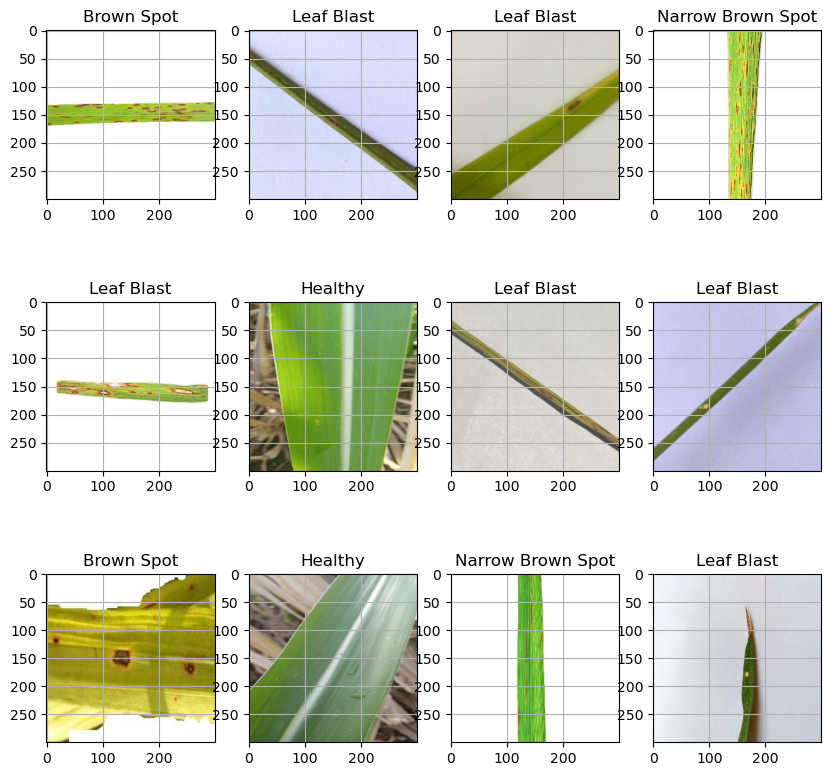

In [83]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [84]:
plt.tight_layout()
plt.savefig("training_samples.png")  # File will be saved in the current directory
plt.show()

<Figure size 640x480 with 0 Axes>

In [87]:
from tensorflow.keras import layers, models

# Assuming img_height and img_width are defined
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Use Input layer for the input shape
    layers.Rescaling(1./255),  # No need to pass input_shape here
    layers.Conv2D(20, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(20, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])


In [89]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 298, 298, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 149, 149, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 147, 147, 20)   │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 106580)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │     1,705,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,709,833 (6.52 MB)

 Trainable params: 1,709,833 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
epochs = 5
history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 703ms/step - accuracy: 0.3395 - loss: 1.7863 - val_accuracy: 0.5809 - val_loss: 1.0318
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5986 - loss: 1.0066 - val_accuracy: 0.6763 - val_loss: 0.8004
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 613ms/step - accuracy: 0.6549 - loss: 0.8353 - val_accuracy: 0.7273 - val_loss: 0.6935
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 539ms/step - accuracy: 0.7051 - loss: 0.7227 - val_accuracy: 0.7428 - val_loss: 0.6684
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7549 - loss: 0.6197 - val_accuracy: 0.7384 - val_loss: 0.6089


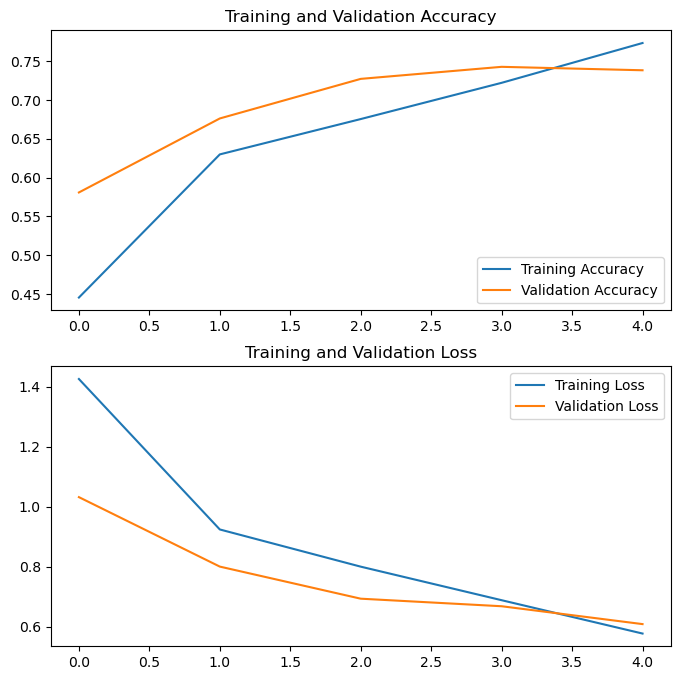

Maximum Validation Accuracy: 0.7427937984466553


In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

In [95]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Assuming these are already loaded and match your training config
batch_size = 32
img_height = 180
img_width = 180

# Reload testing dataset with shuffle=False to keep labels aligned
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\valid',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # <-- important for matching predictions with true labels
)

# Get true labels from dataset
class_names = testing_ds.class_names
y_true = np.concatenate([labels.numpy() for _, labels in testing_ds])

# Predict using the model
y_pred_probs = model.predict(testing_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Rice Disease Detection')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Found 2256 files belonging to 5 classes.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 106580, but received input with shape (32, 36980)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 180, 180, 3), dtype=float32)
  • training=False
  • mask=None

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


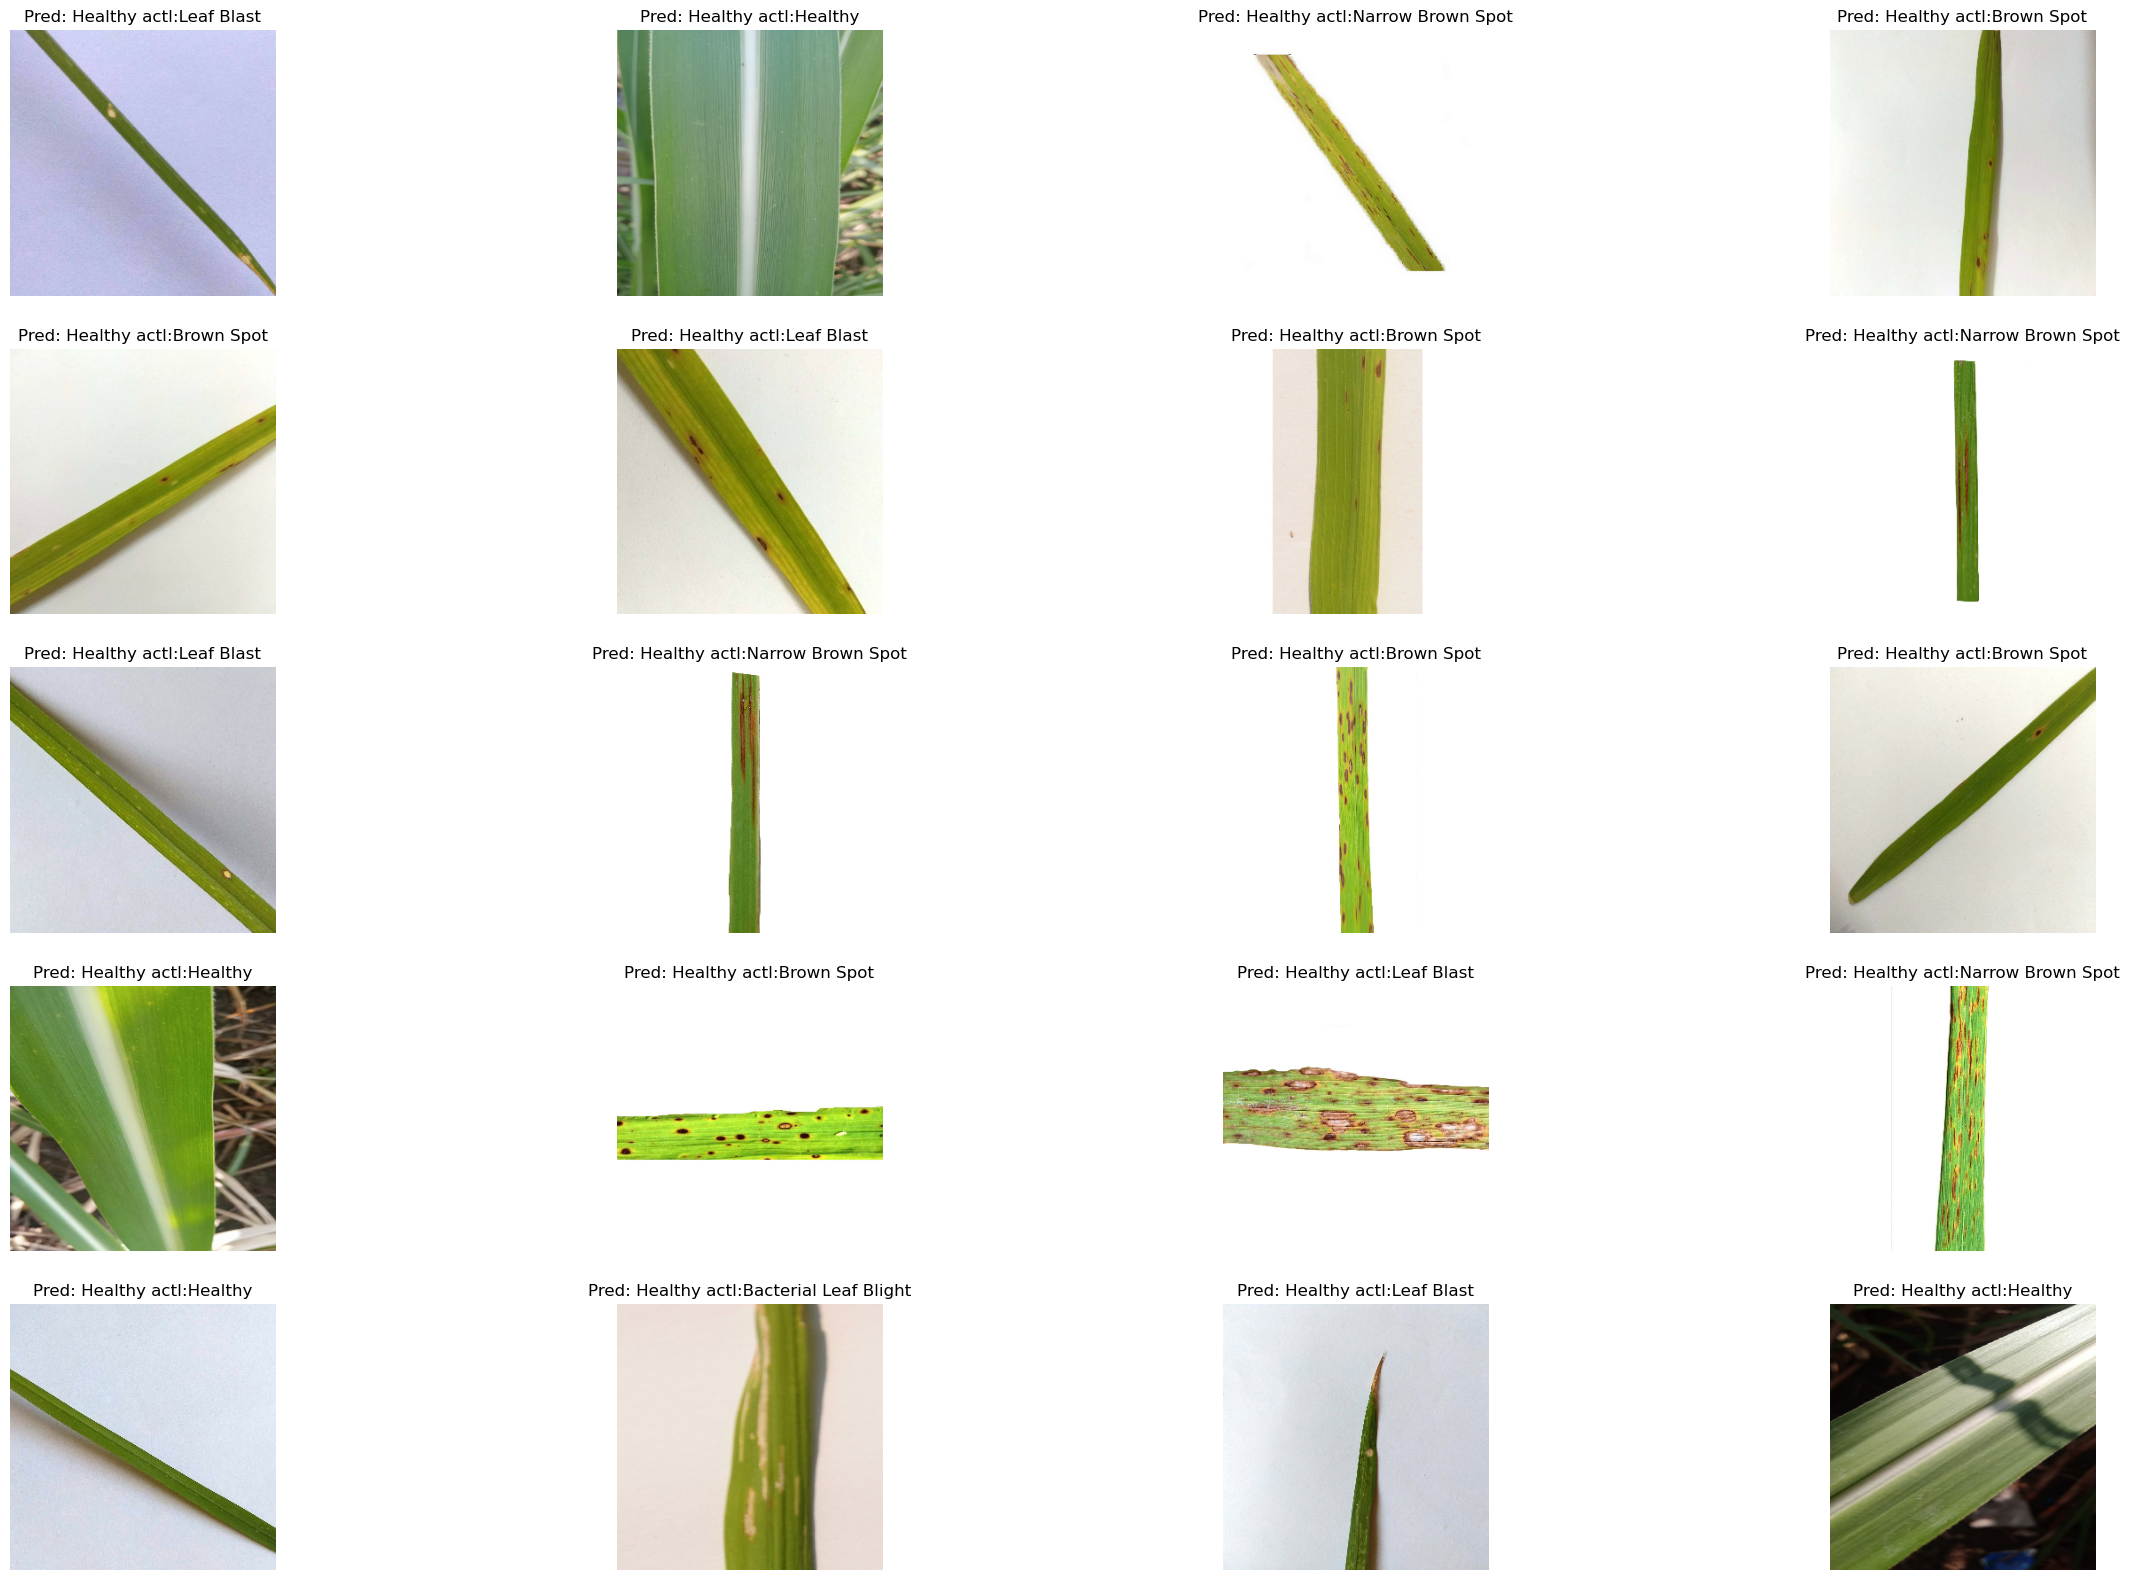

In [17]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [18]:
#model.save('./frontend/riceplantdetectionmodel.h5',include_optimizer=True)
# model.save('riceplantdetectionmodel.h5',include_optimizer=True)
model.save('riceplantdetectionmodel.keras', include_optimizer=True)


In [19]:
from tensorflow.keras.preprocessing import image
file_path=r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Bacterial Leaf Blight\bacterial_leaf_blight (6).JPG'
img = image.load_img(file_path, target_size=(300,300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 
pred=model.predict(img_array)[0]
np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


2

In [25]:
for i in range(10,50):
    image_path=r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Leaf Blast\leaf_blast ({}).jpg'.format(i)
    img = image.load_img(image_path, target_size=(300, 300))  # Set the target size as needed

# Convert the image to a numpy array
    img_array = image.img_to_array(img)

# Expand the dimensions to create a batch of size 1
    img_array = tf.expand_dims(img_array, 0)

    pred=model.predict(img_array)[0]
    print(class_names[int (round(np.argmax(pred)))])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Define the class names for rice diseases (update this list as per your model's training)
class_names = ['Leaf Blast', 'Brown Spot', 'Bacterial Blight', 'Others']  # Example, adjust to your classes

# Load the model
model = tf.keras.models.load_model('riceplantdetectionmodel.keras')  # Assuming you're using the .keras format for the model

# Define the base folder path
base_folder_path = r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train'

# Loop through the diseases (assuming you have one folder per disease)
for disease_folder in os.listdir(base_folder_path):
    disease_folder_path = os.path.join(base_folder_path, disease_folder)
    
    if os.path.isdir(disease_folder_path):  # Only process folders
        print(f"Processing images for disease: {disease_folder}")
        
        # Loop through images in the disease folder
        for i in range(10, 50):  # Adjust the range as necessary, assuming images are named like 'leaf_blast (10).jpg', etc.
            image_path = os.path.join(disease_folder_path, f'leaf_blast ({i}).jpg')  # Update naming pattern if needed
            if os.path.exists(image_path):  # Check if the image exists
                img = image.load_img(image_path, target_size=(300, 300))  # Resize image to match model input

                # Convert the image to a numpy array
                img_array = image.img_to_array(img)

                # Expand the dimensions to create a batch of size 1
                img_array = tf.expand_dims(img_array, 0)

                # Get predictions from the model
                pred = model.predict(img_array)[0]

                # Print the predicted class
                predicted_class = class_names[int(round(np.argmax(pred)))]  # Get the predicted class label
                print(f"Prediction for image {image_path}: {predicted_class}")


Processing images for disease: Bacterial Leaf Blight
Processing images for disease: Brown Spot
Processing images for disease: Healthy
Processing images for disease: Leaf Blast
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
Prediction for image C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Leaf Blast\leaf_blast (10).jpg: Bacterial Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction for image C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Leaf Blast\leaf_blast (11).jpg: Bacterial Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction for image C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Leaf Blast\leaf_blast (12).jpg: Bacterial Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction for image C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Leaf Blast\leaf_blast (13).jpg: Bacterial Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction for image C:\Users\abc\Desktop\Final Proje

In [31]:
## TRain Valid all deseasesimport tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Initialize model (make sure the model is already defined and compiled)
# model = ...

# Define the target size for image resizing
img_height, img_width = 128, 128

# Define class names (make sure these correspond to your dataset's class labels)
class_names = ['Bacterial Leaf Blight', 'Leaf Blast', 'Brown Spot', 'Narrow Brown Spot' 'Healthy']

# Function to predict disease from image path
def predict_disease(image_path, model):
    img = image.load_img(image_path, target_size=(img_height, img_width))  # Load image
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    
    # Predict
    pred_probs = model.predict(img_array)
    predicted_class_idx = np.argmax(pred_probs, axis=1)[0]
    
    return class_names[predicted_class_idx], pred_probs[0][predicted_class_idx]

# Iterate through images in the directory for each disease category
disease_folder = r"C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train\Bacterial Leaf Blight"

# Loop through images for each disease (example with bacterial leaf blight)
for i in range(1, 21):  # Assuming you have 20 images for this class
    image_path = f"{disease_folder}\\bacterial_leaf_blight ({i}).JPG"  # Change number for each image
    predicted_class, confidence = predict_disease(image_path, model)
    
    print(f"Image {i}: Predicted Disease: {predicted_class}, Confidence: {confidence:.4f}")

# Similarly, you can loop for other disease classes, e.g., Leaf Blast, Brown Spot, etc.

# For Leaf Blast
for i in range(1, 21):
    image_path = f"{disease_folder}\\leaf_blast ({i}).JPG"
    predicted_class, confidence = predict_disease(image_path, model)
    
    print(f"Image {i}: Predicted Disease: {predicted_class}, Confidence: {confidence:.4f}")

# Similarly for other diseases like "brown_spot" and "narrow_brown_spot"
# for i in range(1, 21):
#     image_path = f"{disease_folder}\\ narrow_brown ({i}).JPG"
#     predicted_class, confidence = predict_disease(image_path, model)
    
#     print(f"Image {i}: Predicted Disease: {predicted_class}, Confidence: {confidence:.4f}")


# for i in range(1, 21):
#     image_path = f"{disease_folder}\\ healthy ({i}).JPG"
#     predicted_class, confidence = predict_disease(image_path, model)
    
#     print(f"Image {i}: Predicted Disease: {predicted_class}, Confidence: {confidence:.4f}")



##




In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Set up image size and batch size
img_height, img_width = 128, 128
batch_size = 32

# Define training and validation directories
train_dir = r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\train'
validation_dir = r'C:\Users\abc\Desktop\Final Project\Plant_Disease_Prediction\ricedata\valid'

# Create ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize image pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2168 images belonging to 5 classes.
Found 2256 images belonging to 5 classes.


In [35]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\abc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


C:\Users\abc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.3857 - loss: 1.4663 - val_accuracy: 0.6612 - val_loss: 0.8348
Epoch 2/5
 1/67 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.5938 - loss: 0.9869

C:\Users\abc\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


67/67 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5938 - loss: 0.9869 - val_accuracy: 0.6589 - val_loss: 0.8687
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6239 - loss: 0.9897 - val_accuracy: 0.7393 - val_loss: 0.6875
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7500 - loss: 0.7186 - val_accuracy: 0.6621 - val_loss: 0.7759
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6635 - loss: 0.8795 - val_accuracy: 0.7911 - val_loss: 0.5761


In [38]:
# Make predictions on the validation set
y_pred_probs = model.predict(validation_generator)
predicted_categories = np.argmax(y_pred_probs, axis=1)

# Get true labels from the validation set
Y_true = validation_generator.classes

# Get class names from the generator
class_names = list(validation_generator.class_indices.keys())

# Print the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_names))

# Print confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)
print(cm)


SyntaxError: invalid syntax (731233123.py, line 16)